In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
combined_data = pd.read_csv('data/combined_data/cleaned_data.csv')

In [3]:
combined_data.head()

,T,TM,Tm,H,PP,VV,V,VM,PM_2_5
0,21.0,27.6,14.6,61.0,0.0,6.0,2.2,3.5,284.795833
1,21.6,27.7,17.0,59.0,0.0,6.8,2.0,3.5,239.695455
2,22.3,29.0,16.1,48.0,0.0,6.9,2.8,3.5,182.187500
3,20.9,29.0,16.0,66.0,0.0,5.5,2.2,3.5,264.064286
4,20.9,27.8,16.0,62.0,0.0,6.3,3.0,5.4,223.208333


In [4]:
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

## LINEAR REGRESSION

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [7]:
f'Coefficient of determination R^2 on train set {lin_reg.score(X_train, y_train)}'
# must be close to 1, 1 is perfect fit

'Coefficient of determination R^2 on train set 0.3277199292518267'

In [8]:
f'Coefficient of determination R^2 on test set {lin_reg.score(X_test, y_test)}'

'Coefficient of determination R^2 on test set 0.33941861523323413'

In [9]:
lin_reg.coef_

array([-22.79490494,  -1.99488386,  -0.53927475,  -1.97695236,
        -0.42586325,  -0.55757108,  -5.67805017,  -0.7269235 ])

In [10]:
lin_reg.intercept_

907.9315325387801

In [11]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X, y, cv = 3)

In [12]:
score.mean()

0.2750211976373133

In [13]:
pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coeff'])

,Coeff
T,-22.794905
TM,-1.994884
Tm,-0.539275
H,-1.976952
PP,-0.425863
VV,-0.557571
V,-5.678050
VM,-0.726924


In [14]:
c = 0
for val in lin_reg.coef_:
    effect = 'increase' if val>0 else 'decrease'
    print(f'Holding all other features fixed a 1 unit increase in {X.columns[c]} is associated with {effect} of val in AQI PM2.5')
    c = c+1

Holding all other features fixed a 1 unit increase in T is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in TM is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in Tm is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in H is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in PP is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in VV is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in V is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in VM is associated with decrease of val in AQI PM2.5


In [15]:
pred = lin_reg.predict(X_test)

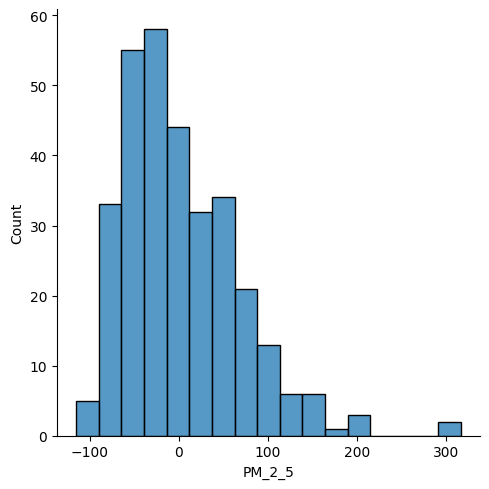

In [16]:
sns.displot(y_test - pred)

In [17]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, pred))}")

Mean Abs Error: 51.29253137766692
Mean Sq Error: 4368.1075506356765
Root Mean Error: 66.09166021999808


In [18]:
np.mean(cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv=3))
# neg_mean_squared_error must be as close to 0 as possible

-5330.456677175277

## RIDGE REGRESSION

In [19]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_cv = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=3)
ridge_cv.fit(X,y)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [20]:
ridge_cv.best_params_

{'alpha': 20}

In [21]:
ridge_cv.best_score_

-5324.427704031537

## LASSO REGRESSION

In [22]:
from sklearn.linear_model import Lasso
lasso = Lasso(tol=1)
# used tol = 1 since warning was given that convergence not taking place
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 50]}
lasso_cv = GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=3)
lasso_cv.fit(X,y)

GridSearchCV(cv=3, estimator=Lasso(tol=1),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 50]},
             scoring='neg_mean_squared_error')

In [23]:
lasso_cv.best_params_

{'alpha': 5}

In [24]:
lasso_cv.best_score_

-5267.02231633162

In [25]:
pred = lasso_cv.predict(X_test)

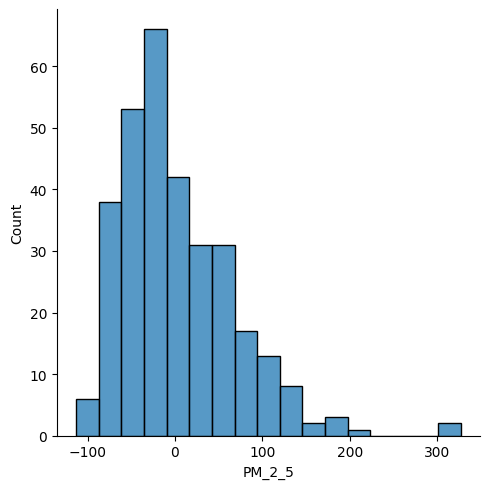

In [26]:
sns.displot(y_test-pred)

In [27]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, pred))}")

Mean Abs Error: 50.57775636048668
Mean Sq Error: 4305.87071294035
Root Mean Error: 65.61913374116082


In [28]:
import pickle
pickle.dump(lasso_cv, open('lasso.pkl', 'wb'))